# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation.

In [1]:
from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [2]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image, gaussFilter, mode = 'same')
filterResponseSobelX = signal.convolve2d(image, sobelX, mode = 'valid')
filterResponseSobelY = signal.convolve2d(image, sobelY, mode = 'same')

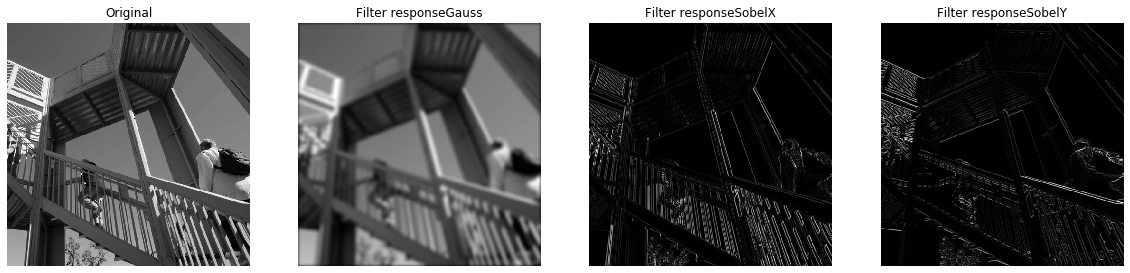

In [3]:
# Show filter responses
import matplotlib.pyplot as plt
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter responseGauss')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter responseSobelX')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter responseSobelY')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

 * Gaussian filter seems to blur the image. It reduced the contrast.
 * Sobel filter s a filter for edge detection that is finding the area in an image with sharp changes in the intensity or the color. The detection can be performed in x- or y-direction.
 
 

Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?
 * The size of the original image: It is a 2-D image of (512, 512) or 262144 pixels. It has 1 channel. Normally an image has three channels which are red, blue, and green referd to as RGB.

Question 3: What is the size of the different filters?
 * gaussFilter-- shape:(15, 15), Dimension:2, size:225
 * sobelX-- shape:(3, 3), Dimension:2, size:9
 * sobelY-- shape:(3, 3), Dimension:2, size:9
 

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?
 * As same as the original image

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 
 * filterResponseSobelX_valid-- shape:(510, 510), Dimension:2, size:260100. 
 * 'valid' mode ignores the edges pixels. It means that two end rows and two end columns get trimmed off. So reducing 2 units from each dimention. nrow(output) = nrow(input) - (nrwo(filter)-1) and the same for the number of the columns.
 
 

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?
 * As it is mentioned the size of the output is smaller than of the input by (nF -1), so for a high number of layers we eventually run out of the pixels.
 
 #### refrences:
   * lecture sildes
   * https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
   * https://www.thecuriousdev.org/understanding-convolution/
   * https://medium.com/datadriveninvestor/understanding-edge-detection-sobel-operator-2aada303b900


In [4]:
# Your code for checking sizes of image and filter responses

print(f'original image-- shape:{image.shape}, Dimension:{image.ndim}, size:{image.size}') #Shape

print(f'gaussFilter-- shape:{gaussFilter.shape}, Dimension:{gaussFilter.ndim}, size:{gaussFilter.size}')

print(f'sobelX-- shape:{sobelX.shape}, Dimension:{sobelX.ndim}, size:{sobelX.size}')

print(f'sobelY-- shape:{sobelY.shape}, Dimension:{sobelY.ndim}, size:{sobelY.size}')

print(f'filterResponseGauss_same-- shape:{filterResponseGauss.shape},Dimension:{filterResponseGauss.ndim}, size:{filterResponseGauss.size}')

print(f'filterResponseSobelX_valid-- shape:{filterResponseSobelX.shape},Dimension:{filterResponseSobelX.ndim}, size:{filterResponseSobelX.size}')


original image-- shape:(512, 512), Dimension:2, size:262144
gaussFilter-- shape:(15, 15), Dimension:2, size:225
sobelX-- shape:(3, 3), Dimension:2, size:9
sobelY-- shape:(3, 3), Dimension:2, size:9
filterResponseGauss_same-- shape:(512, 512),Dimension:2, size:262144
filterResponseSobelX_valid-- shape:(510, 510),Dimension:2, size:260100


##  Part 3: Get a graphics card

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [5]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

Using TensorFlow backend.


IndexError: list index out of range

##  Part 4: How fast is the graphics card?

Lets investigate how much faster a convolution is with the graphics card

Question 7: Why are the filters of size 7 x 7 x 3, and not 7 x 7 ?
 * 3 is the number of channels. Because the color images have normally 3 channels; RGB.

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?
 * A 'Conv2D' layer creates a convolution kernel which is convolved with the input layer to produce a tensor of outputs. It is a standard 2D convolution which performed by signal.convolve2d.
 

Question 9: How much faster is the graphics card, compared to the CPU, for convolving a batch of 100 images?

Question 10: How much faster is the graphics card, compared to the CPU, for convolving a batch of 2 images? Explain the difference compared to 100 images.

In [6]:
# Run this cell to compare processing time of CPU and GPU

import timeit

n_images_in_batch = 100

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

# Perform convolutions using the CPU
def cpu():
  with tf.device('/cpu:0'):
    random_images = tf.random.normal((n_images_in_batch, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_images)
    return tf.math.reduce_sum(net_cpu)

# Perform convolutions using the GPU (graphics card)
def gpu():
  with tf.device('/device:GPU:0'):
    random_images = tf.random.normal((n_images_in_batch, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_images)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the convolution several times and measure the time
print('Time (s) to convolve 32 filters of size 7 x 7 x 3 over 100 random images of size 100 x 100 x 3'
      ' (batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))



This error most likely means that this notebook is not configured to use a GPU.  Change this in Notebook Settings via the command palette (cmd/ctrl-shift-P) or the Edit menu.




SystemError: GPU device not found

##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [7]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

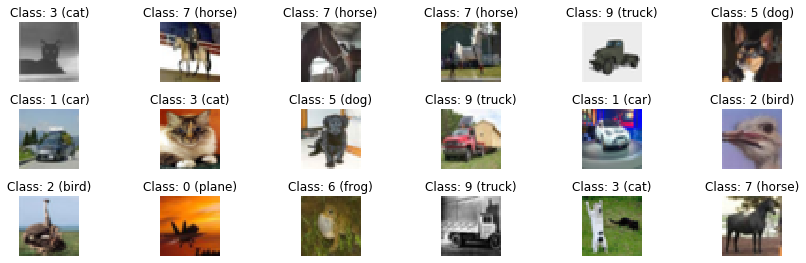

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.25)

# Print the size of training data, validation data and test data
print('The training X and Y size: {}, {}'.format(Xtrain.shape, Ytrain.shape))
print('The validation X and Y size: {}, {}'.format(Xval.shape, Yval.shape))
print('The test X and Y size: {}, {}'.format(Xtest.shape, Ytest.shape))




The training X and Y size: (7500, 32, 32, 3), (7500, 1)
The validation X and Y size: (2500, 32, 32, 3), (2500, 1)
The test X and Y size: (2000, 32, 32, 3), (2000, 1)


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [10]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/utils/#to_categorical

In [11]:
from keras.utils import to_categorical

# Print shapes before converting the labels
print(f'Ytrain, Yval, Ytest shapes: {Ytrain.shape}, {Yval.shape}, {Ytest.shape}')

# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain = to_categorical(Ytrain, num_classes=10, dtype='float32')
Yval = to_categorical(Yval, num_classes=10, dtype='float32')
Ytest = to_categorical(Ytest, num_classes=10, dtype='float32')
# Print shapes after converting the labels
print(f'Ytrain, Yval, Ytest shapes: {Ytrain.shape}, {Yval.shape}, {Ytest.shape}')

Ytrain, Yval, Ytest shapes: (7500, 1), (2500, 1), (2000, 1)
Ytrain, Yval, Ytest shapes: (7500, 10), (2500, 10), (2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/layers/core/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/)

See https://keras.io/models/model/ for how to compile, train and evaluate the model

In [17]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01):

    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Conv2D(filters = n_filters, kernel_size = (3, 3),
                     padding = 'same', activation = 'relu', input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    
    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
        model.add(Conv2D(filters = n_filters*((i+1) * 2), kernel_size = (3, 3),
                         padding = 'same', activation = 'relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size = (2, 2)))
        
    
    # Add flatten layer
    model.add(Flatten())
    
    # Add intermediate dense layers
    if n_dense_layers > 0:
        for i in range(n_dense_layers):
            model.add(Dense(n_nodes, activation = 'relu'))
            model.add(BatchNormalization())
            if use_dropout == True:
                model.add(Dropout(0.5))
    # Add final dense layer
    model.add(Dense(10, activation = 'softmax'))
   
    # Compile model
    model.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [13]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

## 2 convolutional layers, no intermediate dense layers

In [18]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32, 32, 3)

# Build model
model1 = build_CNN(input_shape = input_shape, n_conv_layers=2, n_filters=16,
                   n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history1 = model1.fit(Xtrain, Ytrain,
                      batch_size = batch_size,
                      epochs = epochs,
                      validation_data = (Xval, Yval))

Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 12s 2ms/step - loss: 2.0180 - accuracy: 0.3459 - val_loss: 2.0462 - val_accuracy: 0.3072
Epoch 2/20
7500/7500 [==============================] - 11s 2ms/step - loss: 1.4727 - accuracy: 0.4887 - val_loss: 1.9245 - val_accuracy: 0.3228
Epoch 3/20
7500/7500 [==============================] - 12s 2ms/step - loss: 1.2719 - accuracy: 0.5539 - val_loss: 1.7599 - val_accuracy: 0.3872
Epoch 4/20
7500/7500 [==============================] - 12s 2ms/step - loss: 1.1219 - accuracy: 0.6060 - val_loss: 1.5920 - val_accuracy: 0.4412
Epoch 5/20
7500/7500 [==============================] - 12s 2ms/step - loss: 1.0031 - accuracy: 0.6488 - val_loss: 1.4645 - val_accuracy: 0.4808
Epoch 6/20
7500/7500 [==============================] - 13s 2ms/step - loss: 0.9032 - accuracy: 0.6865 - val_loss: 1.3775 - val_accuracy: 0.5076
Epoch 7/20
7500/7500 [==============================] - 13s 2ms/step - loss: 0.810

In [19]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 1s 465us/step
Test loss: 1.8634
Test accuracy: 0.5435


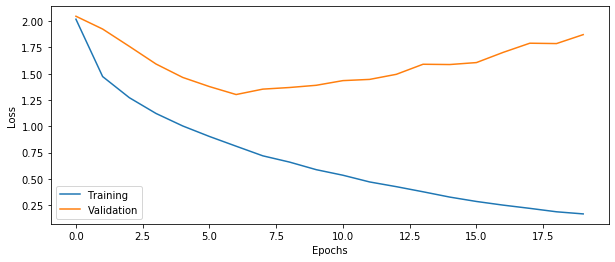

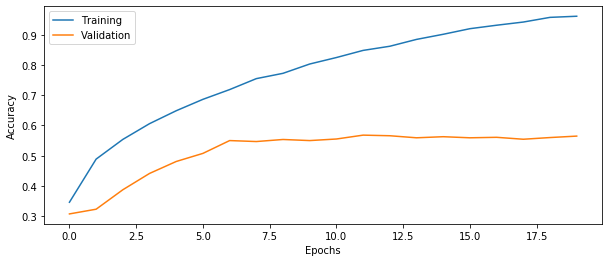

In [20]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance
Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 

Question 11: How big is the difference between training and test accuracy?
* Training accuracy: accuracy: 0.9616
* Test accuracy: 0.5435

Question 12: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'watch nvidia-smi' on the cloud computer during training. 

Question 13: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [21]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32, 32, 3)

# Build model
model2 = build_CNN(input_shape = input_shape, n_conv_layers=2, n_filters=16,
                   n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)


# Train the model  using training data and validation data
history2 = model2.fit(Xtrain, Ytrain,
                      batch_size = batch_size,
                      epochs = epochs,
                      validation_data = (Xval, Yval))

Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 13s 2ms/step - loss: 1.7084 - accuracy: 0.3959 - val_loss: 2.4890 - val_accuracy: 0.1040
Epoch 2/20
7500/7500 [==============================] - 12s 2ms/step - loss: 1.2585 - accuracy: 0.5563 - val_loss: 2.9491 - val_accuracy: 0.1092
Epoch 3/20
7500/7500 [==============================] - 12s 2ms/step - loss: 1.0555 - accuracy: 0.6260 - val_loss: 3.0988 - val_accuracy: 0.1408
Epoch 4/20
7500/7500 [==============================] - 13s 2ms/step - loss: 0.8671 - accuracy: 0.7035 - val_loss: 2.6247 - val_accuracy: 0.2144
Epoch 5/20
7500/7500 [==============================] - 13s 2ms/step - loss: 0.7100 - accuracy: 0.7731 - val_loss: 2.0511 - val_accuracy: 0.3092
Epoch 6/20
7500/7500 [==============================] - 13s 2ms/step - loss: 0.5475 - accuracy: 0.8343 - val_loss: 1.7608 - val_accuracy: 0.4092
Epoch 7/20
7500/7500 [==============================] - 13s 2ms/step - loss: 0.426

In [22]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 1s 470us/step
Test loss: 1.9612
Test accuracy: 0.5470


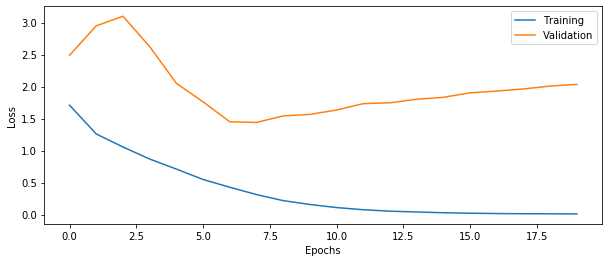

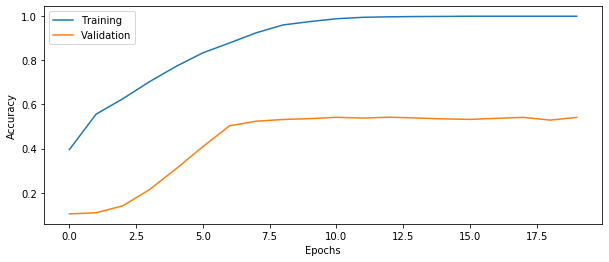

In [23]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [24]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32, 32, 3)

# Build model
model3 = build_CNN(input_shape = input_shape, n_conv_layers=4, n_filters=16,
                   n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)


# Train the model  using training data and validation data
history3 = model3.fit(Xtrain, Ytrain,
                      batch_size = batch_size,
                      epochs = epochs,
                      validation_data = (Xval, Yval))



Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 16s 2ms/step - loss: 1.7797 - accuracy: 0.3755 - val_loss: 2.7489 - val_accuracy: 0.1008
Epoch 2/20
7500/7500 [==============================] - 15s 2ms/step - loss: 1.2842 - accuracy: 0.5475 - val_loss: 3.0621 - val_accuracy: 0.1028
Epoch 3/20
7500/7500 [==============================] - 15s 2ms/step - loss: 1.0628 - accuracy: 0.6289 - val_loss: 2.8547 - val_accuracy: 0.1500
Epoch 4/20
7500/7500 [==============================] - 16s 2ms/step - loss: 0.8706 - accuracy: 0.7000 - val_loss: 2.3648 - val_accuracy: 0.2500
Epoch 5/20
7500/7500 [==============================] - 16s 2ms/step - loss: 0.6634 - accuracy: 0.7916 - val_loss: 1.9648 - val_accuracy: 0.3432
Epoch 6/20
7500/7500 [==============================] - 15s 2ms/step - loss: 0.5020 - accuracy: 0.8437 - val_loss: 1.7242 - val_accuracy: 0.4352
Epoch 7/20
7500/7500 [==============================] - 15s 2ms/step - loss: 0.361

In [25]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 1s 594us/step
Test loss: 1.9934
Test accuracy: 0.5430


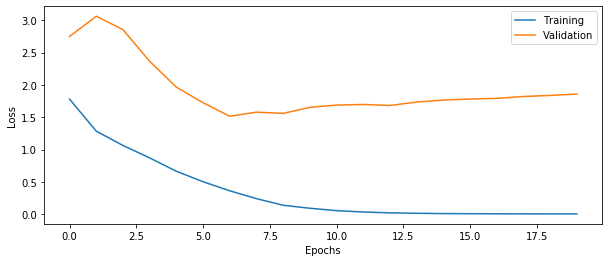

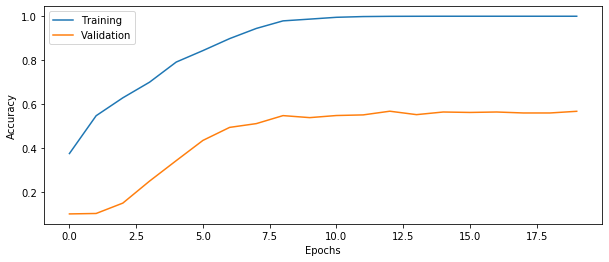

In [26]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 14: How many trainable parameters does your network have? Which part of the network contains most of the parameters?
 * Trainable params: 99,252. convolution layers have the most of the parameters.

Question 15: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 

Question 16: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/

Question 17: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?

Question 18: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?

Question 19: How does MaxPooling help in reducing the number of parameters to train?

In [27]:
# Print network architecture

model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_11 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)         

##  Part 14: Dropout regularization

Add dropout regularization to each intermediate dense layer, dropout probability 50%.

Question 20: How much did the test accuracy improve with dropout, compared to without dropout?

Question 21: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?


## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [28]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32, 32, 3)

# Build model
model4 = build_CNN(input_shape = input_shape, n_conv_layers=4, n_filters=16,
                   n_dense_layers=1, n_nodes=50, use_dropout=True, learning_rate=0.01)


# Train the model  using training data and validation data
history4 = model4.fit(Xtrain, Ytrain,
                      batch_size = batch_size,
                      epochs = epochs,
                      validation_data = (Xval, Yval))



Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 16s 2ms/step - loss: 2.2987 - accuracy: 0.2711 - val_loss: 2.5298 - val_accuracy: 0.0996
Epoch 2/20
7500/7500 [==============================] - 16s 2ms/step - loss: 1.7170 - accuracy: 0.4012 - val_loss: 2.9699 - val_accuracy: 0.0996
Epoch 3/20
7500/7500 [==============================] - 17s 2ms/step - loss: 1.4828 - accuracy: 0.4668 - val_loss: 2.8227 - val_accuracy: 0.1132
Epoch 4/20
7500/7500 [==============================] - 15s 2ms/step - loss: 1.3329 - accuracy: 0.5271 - val_loss: 2.4100 - val_accuracy: 0.2036
Epoch 5/20
7500/7500 [==============================] - 15s 2ms/step - loss: 1.2050 - accuracy: 0.5748 - val_loss: 1.7404 - val_accuracy: 0.3664
Epoch 6/20
7500/7500 [==============================] - 16s 2ms/step - loss: 1.0884 - accuracy: 0.6227 - val_loss: 1.5934 - val_accuracy: 0.4376
Epoch 7/20
7500/7500 [==============================] - 15s 2ms/step - loss: 0.976

In [29]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 1s 611us/step
Test loss: 1.9493
Test accuracy: 0.5530


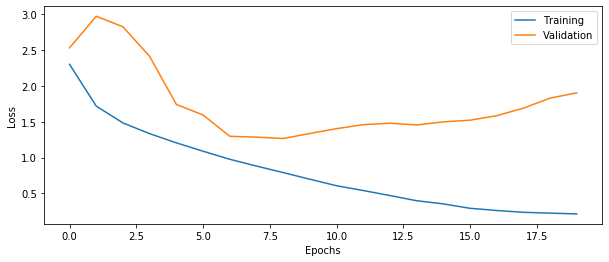

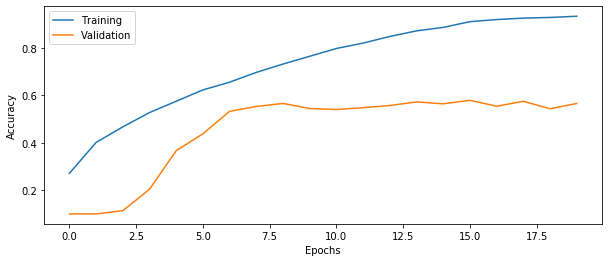

In [30]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 22: How high test accuracy can you obtain? What is your best configuration?
* batch_size = 32
* epochs = 25
* No. of conv. layer: 4
* No. of dense layers: 2
* No. of nodes: 50
* No. of filters: 16
* Use dropout: True with probability :0.5
* Learning rate: 0.01


## Your best config

In [31]:
# Setup some training parameters
batch_size = 64
epochs = 25
input_shape = (32, 32, 3)

# Build model
model5 = build_CNN(input_shape = input_shape, n_conv_layers=3, n_filters=16,
                   n_dense_layers=2, n_nodes=50, use_dropout=True, learning_rate=0.01)


# Train the model  using training data and validation data
history5 = model5.fit(Xtrain, Ytrain,
                      batch_size = batch_size,
                      epochs = epochs,
                      validation_data = (Xval, Yval))


Train on 7500 samples, validate on 2500 samples
Epoch 1/25
7500/7500 [==============================] - 18s 2ms/step - loss: 2.5134 - accuracy: 0.2021 - val_loss: 2.7559 - val_accuracy: 0.1180
Epoch 2/25
7500/7500 [==============================] - 18s 2ms/step - loss: 1.9729 - accuracy: 0.2928 - val_loss: 1.7798 - val_accuracy: 0.3388
Epoch 3/25
7500/7500 [==============================] - 17s 2ms/step - loss: 1.7608 - accuracy: 0.3465 - val_loss: 1.5366 - val_accuracy: 0.4392
Epoch 4/25
7500/7500 [==============================] - 18s 2ms/step - loss: 1.6236 - accuracy: 0.3936 - val_loss: 1.4047 - val_accuracy: 0.4864
Epoch 5/25
7500/7500 [==============================] - 18s 2ms/step - loss: 1.5407 - accuracy: 0.4260 - val_loss: 1.4025 - val_accuracy: 0.4780
Epoch 6/25
7500/7500 [==============================] - 19s 3ms/step - loss: 1.4515 - accuracy: 0.4744 - val_loss: 1.2942 - val_accuracy: 0.5228
Epoch 7/25
7500/7500 [==============================] - 19s 3ms/step - loss: 1.370

In [32]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 1s 634us/step
Test loss: 1.5242
Test accuracy: 0.5950


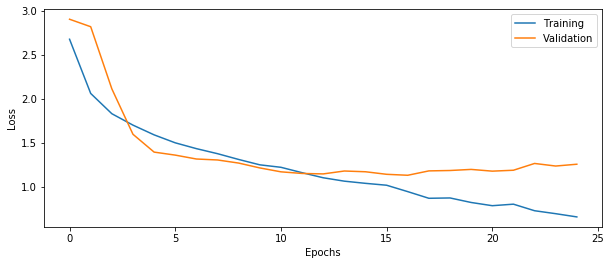

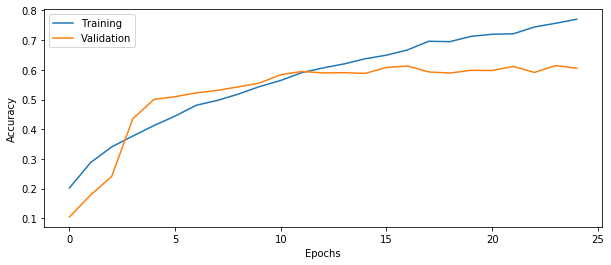

In [54]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 23: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.
* Test accuracy: 0.2240
* We have rotated the X without changing y respectively and building a new model accordingly.so the coeffitionts of the model have not changed properly.

In [33]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

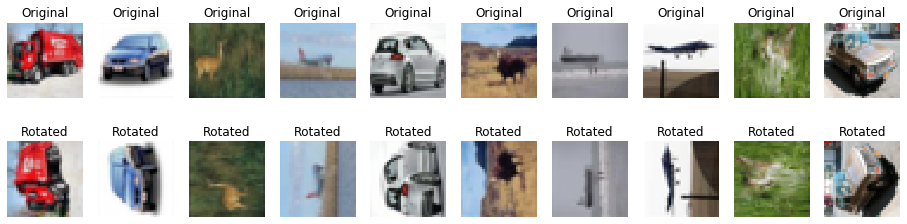

In [34]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [35]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(Xtest_rotated, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 1s 660us/step
Test loss: 4.1457
Test accuracy: 0.2240


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://keras.io/preprocessing/image/

In [36]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [44]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=30, horizontal_flip=True, vertical_flip=True, validation_split=0.2)


# Setup a flow for training data, assume that we can fit all images into CPU memory
training_data = datagen.flow(Xtrain, Ytrain, batch_size=1, subset='training')

# Setup a flow for validation data, assume that we can fit all images into CPU memory
validation_data=datagen.flow(Xtrain, Ytrain, batch_size=1, subset='validation')

## Part 18: What about big data?

Question 24: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

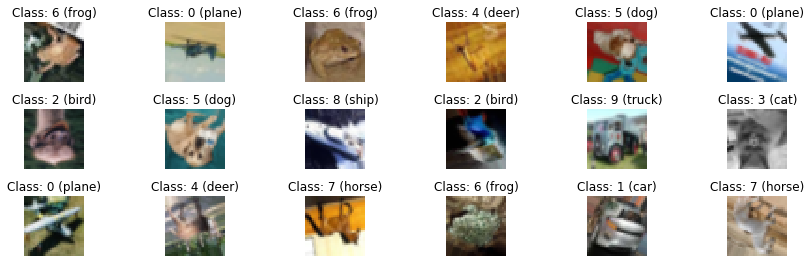

In [42]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/models/model/ for how to use model.fit_generator instead of model.fit for training

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size

Question 25: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. What parameter is necessary to change to perform more training?

Question 26: What other types of image augmentation can be applied, compared to what we use here?

In [46]:
# Setup some training parameters
batch_size = 64
epochs = 200
input_shape = (32, 32, 3)


# Build model (your best config)
model6 = build_CNN(input_shape = input_shape, n_conv_layers=3, n_filters=16,
                   n_dense_layers=2, n_nodes=50, use_dropout=True, learning_rate=0.01)

validation_split=0.2
    
# Train the model using on the fly augmentation
history6 = model6.fit_generator(training_data,
                                steps_per_epoch=len(Xtrain)*(1 - validation_split)/batch_size,                                
                                epochs = epochs,
                                validation_data = validation_data,
                                validation_steps = len(Xtrain)*validation_split/batch_size)




Epoch 1/200
125/125 [==============================] - 5s 43ms/step - loss: 2.3028 - accuracy: 0.0960 - val_loss: 3.1024 - val_accuracy: 0.2188
Epoch 2/200
125/125 [==============================] - 2s 12ms/step - loss: 2.3063 - accuracy: 0.0880 - val_loss: 16.7862 - val_accuracy: 0.0938
Epoch 3/200
125/125 [==============================] - 2s 13ms/step - loss: 2.3044 - accuracy: 0.0720 - val_loss: 49.9237 - val_accuracy: 0.1875
Epoch 4/200
125/125 [==============================] - 2s 13ms/step - loss: 2.3025 - accuracy: 0.1440 - val_loss: 112.8060 - val_accuracy: 0.1250
Epoch 5/200
125/125 [==============================] - 2s 12ms/step - loss: 2.3054 - accuracy: 0.1200 - val_loss: 742.7042 - val_accuracy: 0.0938
Epoch 6/200
125/125 [==============================] - 2s 13ms/step - loss: 2.3114 - accuracy: 0.1040 - val_loss: 1336.6615 - val_accuracy: 0.0938
Epoch 7/200
125/125 [==============================] - 2s 12ms/step - loss: 2.3057 - accuracy: 0.0960 - val_loss: 4433.1372 - v

In [47]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1312.8082
Test accuracy: 0.1015
Test loss: 1271.4483
Test accuracy: 0.1090


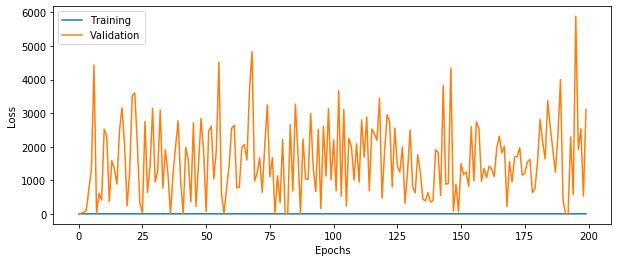

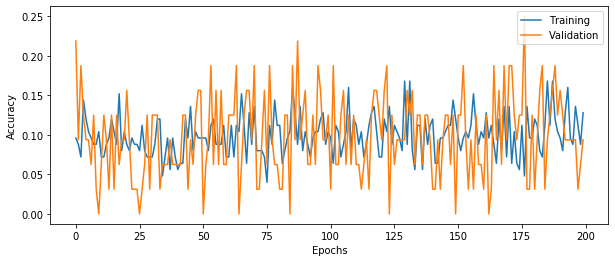

In [48]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly

In [49]:
# Find misclassified images
y_pred = model6.predict_classes(Xtest)
y_correct = np.argmax(Ytest,axis=1)

miss = np.flatnonzero(y_correct != y_pred)

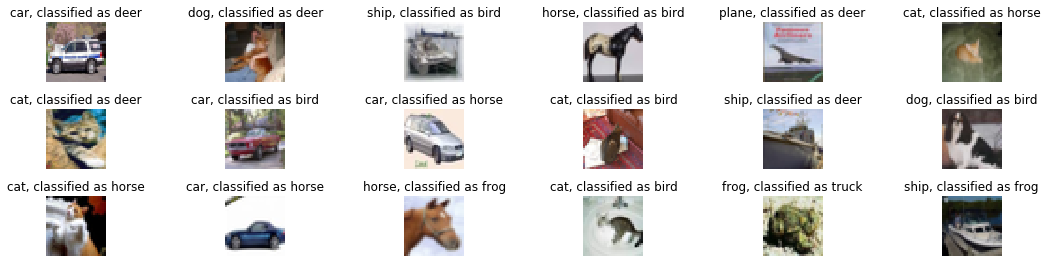

In [50]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 27: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

Question 28: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database. Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 29: How many convolutional layers does ResNet50 have? 
* 53

Question 30: How many trainable parameters does the ResNet50 network have? 
* Trainable params: 25,583,592

Question 31: What is the size of the images that ResNet50 expects as input?
* (3, 224, 224)

Question 32: Using the answer to question 30, explain why the second derivative is seldom used when training deep networks.

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/applications/#resnet

Useful functions

`image.load_img` in keras.preprocessing

`image.img_to_array` in keras.preprocessing

`ResNet50` in keras.applications.resnet50

`preprocess_input` in keras.applications.resnet50

`decode_predictions` in keras.applications.resnet50

`expand_dims` in numpy


In [51]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice
from keras.models import Model
from keras.applications.resnet50 import ResNet50
model = ResNet50(weights='imagenet')
model.summary()



102858752/102853048 [==============================] - 21s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
_______________________

In [60]:
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np


img_path ='C:/Users/mohse/.ipynb_checkpoints/bridge.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

img_path ='C:/Users/mohse/.ipynb_checkpoints/horse.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

img_path ='C:/Users/mohse/.ipynb_checkpoints/panda.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

img_path ='C:/Users/mohse/.ipynb_checkpoints/penguin.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

img_path ='C:/Users/mohse/.ipynb_checkpoints/dice.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n03933933', 'pier', 0.75886863), ('n04366367', 'suspension_bridge', 0.1967369), ('n03095699', 'container_ship', 0.0099998275)]
Predicted: [('n02389026', 'sorrel', 0.8661135), ('n02422106', 'hartebeest', 0.10263007), ('n04604644', 'worm_fence', 0.004174774)]
Predicted: [('n02510455', 'giant_panda', 0.7934009), ('n02500267', 'indri', 0.063997805), ('n04399382', 'teddy', 0.019243803)]
Predicted: [('n02056570', 'king_penguin', 0.90107286), ('n01582220', 'magpie', 0.06251441), ('n02447366', 'badger', 0.0064461594)]
Predicted: [('n04254120', 'soap_dispenser', 0.37234202), ('n03908714', 'pencil_sharpener', 0.13086274), ('n04131690', 'saltshaker', 0.09818212)]
